## Jetson Events Analytics

In [1]:
# import libraries
import boto3
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import datetime as dt
from boto3.dynamodb.conditions import Key, Attr


In [2]:
# declare global variables
tablename = "jetsonevents"
primarykeycolumn = "eventtimestamp"
sortcolumn = "classid"
startdt = "2021-07-25"
enddt="2021-07-26"

In [3]:
# create AWS session for boto3 lib (credentials will be moved to the security file)
session = boto3.Session(
    aws_access_key_id='<your access key>',
    aws_secret_access_key='<sercret access key>')

In [4]:
# create client, db and table objects for DynamoDB lib
client = boto3.client('dynamodb', region_name='us-west-1')
db = boto3.resource('dynamodb', region_name='us-west-1')
table = db.Table(tablename)

In [5]:
# get table schema
response = client.describe_table(TableName=tablename)
print(response)

{'Table': {'AttributeDefinitions': [{'AttributeName': 'classid', 'AttributeType': 'N'}, {'AttributeName': 'eventtimestamp', 'AttributeType': 'S'}], 'TableName': 'jetsonevents', 'KeySchema': [{'AttributeName': 'eventtimestamp', 'KeyType': 'HASH'}, {'AttributeName': 'classid', 'KeyType': 'RANGE'}], 'TableStatus': 'ACTIVE', 'CreationDateTime': datetime.datetime(2021, 7, 25, 18, 46, 42, 346000, tzinfo=tzlocal()), 'ProvisionedThroughput': {'NumberOfDecreasesToday': 0, 'ReadCapacityUnits': 5, 'WriteCapacityUnits': 5}, 'TableSizeBytes': 1637693, 'ItemCount': 9084, 'TableArn': 'arn:aws:dynamodb:us-west-1:325720094646:table/jetsonevents', 'TableId': 'd598c025-e0e8-4966-8013-6e23496517cf'}, 'ResponseMetadata': {'RequestId': 'KJ1HAPE1B57QCRLNLTKEQTMP6NVV4KQNSO5AEMVJF66Q9ASUAAJG', 'HTTPStatusCode': 200, 'HTTPHeaders': {'server': 'Server', 'date': 'Sun, 01 Aug 2021 21:32:59 GMT', 'content-type': 'application/x-amz-json-1.0', 'content-length': '598', 'connection': 'keep-alive', 'x-amzn-requestid': '

In [6]:
# Key Conditional Expression test
#response = table.query(KeyConditionExpression=Key('eventtimestamp').eq(primarykey))
#response['Items']

In [7]:
# query DynamobDB table to get list of payloads for selected date range
response = table.scan(FilterExpression=Attr('eventtimestamp').gte(startdt) & Attr('eventtimestamp').lt(enddt))

In [8]:
# create array of hours and array of classes
hours = [(i, dt.time(i).strftime('%I %p')) for i in range(24)]
hrarr = np.array(range(0,24))
class_0 = [0]*24
class_1 = [0]*24
class_other = [0]*24

print(hours)
print(hrarr)
print(class_0)
print(class_1)
print(class_other)

[(0, '12 AM'), (1, '01 AM'), (2, '02 AM'), (3, '03 AM'), (4, '04 AM'), (5, '05 AM'), (6, '06 AM'), (7, '07 AM'), (8, '08 AM'), (9, '09 AM'), (10, '10 AM'), (11, '11 AM'), (12, '12 PM'), (13, '01 PM'), (14, '02 PM'), (15, '03 PM'), (16, '04 PM'), (17, '05 PM'), (18, '06 PM'), (19, '07 PM'), (20, '08 PM'), (21, '09 PM'), (22, '10 PM'), (23, '11 PM')]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
# loop through the DynamoDB response and calculate classes per hour
for index in range(len(response['Items'])):    
    for key, value in response['Items'][index].items():
        #print(response['Items'][index]["eventtimestamp"])
        eventtime = dt.datetime.strptime(response['Items'][index]["eventtimestamp"], "%Y-%m-%d %H:%M:%S.%f")
        eventhour=eventtime.hour
        classid = response['Items'][index]["classid"]
        if classid==0:
            class_0[eventhour] = class_0[eventhour]+1
        if classid==1:
            class_1[eventhour] = class_1[eventhour]+1
        else:
            class_other[eventhour] = class_other[eventhour]+1

print(class_0)
print(class_1)
print(class_other)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 87, 141, 144, 138]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 156, 123, 135]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 738, 1242, 1302, 1245]


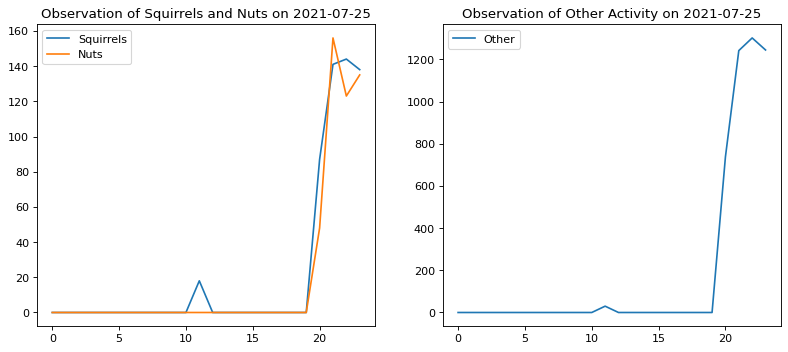

In [10]:
figure(figsize=(12, 5), dpi=80)

plt.subplot(1,2, 1)
plt.plot(hrarr, class_0, label="Squirrels")
plt.plot(hrarr, class_1,  label="Nuts")
#plt.plot(hrarr, class_other, label="Other")
plt.title(label="Observation of Squirrels and Nuts on " + startdt)
plt.legend()

plt.subplot(1,2, 2)
plt.plot(hrarr, class_other, label="Other")
plt.title(label="Observation of Other Activity on " + startdt)
plt.legend()

plt.show()